## Data: Customer Churn Records

## Import Necessary Libraries

In [1]:
# !pip install xgboost

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

## Load and Explore the Dataset

In [3]:
# Load the dataset
df = pd.read_csv("D:/ML-Project/Datasets/Customer-Churn-Records.csv")

In [4]:
# Display the first few rows
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## Customer Churn Dataset Features

- **RowNumber**: Sequential index for each row in the dataset.
- **CustomerId**: Unique identifier for each customer.
- **Surname**: Customer's surname.
- **CreditScore**: Numerical score evaluating the creditworthiness of the customer.
- **Geography**: Customer's location or country.
- **Gender**: Customer's gender (Male/Female).
- **Age**: Customer's age in years.
- **Tenure**: Number of years the customer has been with the bank.
- **Balance**: Amount of money in the customer's account.
- **NumOfProducts**: Number of bank products the customer uses.
- **HasCrCard**: Whether the customer has a credit card (1 for yes, 0 for no).
- **IsActiveMember**: Whether the customer is an active member (1 for yes, 0 for no).
- **EstimatedSalary**: Estimated salary of the customer.
- **Exited**: Binary variable indicating whether the customer churned (1 for yes, 0 for no).
- **Complain**: Binary variable indicating whether the customer has ever complained (1 for yes, 0 for no).
- **Satisfaction Score**: Customer satisfaction score, possibly on a scale.
- **Card Type**: Type of credit card the customer holds.
- **Point Earned**: Points earned by the customer, potentially related to loyalty programs.


In [5]:
# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nColumns and data types:")
print(df.dtypes)

Dataset shape: (10000, 18)

Columns and data types:
RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object


In [6]:
# Display basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [7]:
# Display summary statistics
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


## Statistical Summary Dataset Features

- **RowNumber**: This column represents the sequential index of each row in the dataset, ranging from 1 to 10,000.

- **CustomerId**: Unique identifier for each customer, ranging across the dataset.

- **CreditScore**: The credit score of customers ranges from 350 to 850, with a mean of approximately 650.53 and a standard deviation of about 96.65.

- **Age**: Customer ages range from 18 to 92 years, with an average age of approximately 38.92 years and a standard deviation of about 10.49 years.

- **Tenure**: Indicates the number of years a customer has been with the bank, ranging from 0 to 10 years, with a mean of about 5.01 years.

- **Balance**: The account balances of customers range from 0 to 250,898.09 units, with an average balance of approximately 76,485.89 units and a standard deviation of about 62,397.41 units.

- **NumOfProducts**: Indicates the number of bank products the customer has, ranging from 1 to 4 products on average.

- **HasCrCard**: Binary indicator (1 for yes, 0 for no) showing whether the customer has a credit card, with a mean of approximately 1.53, indicating most customers have a credit card.

- **IsActiveMember**: Binary indicator (1 for yes, 0 for no) showing whether the customer is an active member, with a mean of about 0.71.

- **EstimatedSalary**: Estimated annual salary of customers ranges from 11.58 to 199,992.48 units, with a mean of approximately 100,090.24 units.

- **Exited**: Binary indicator (1 for yes, 0 for no) showing whether the customer churned (left the bank), with a mean of approximately 0.20, indicating about 20% of customers churned.

- **Complain**: Binary indicator (1 for yes, 0 for no) showing whether the customer has ever complained, with a mean of about 0.20.

- **Satisfaction Score**: Customer satisfaction scores range from 1 to 5, with an average score of approximately 3.01.

- **Point Earned**: Points earned by customers, potentially related to loyalty programs, range from 119 to 1000 points, with an average of approximately 606.52 points.

In [8]:
# Check the distribution of class labels
class_distribution = df['Exited'].value_counts()
print("Class distribution:")
print(class_distribution)

# Calculate and print the percentage distribution
class_percentage = df['Exited'].value_counts(normalize=True) * 100
print("\nClass percentage distribution:")
print(class_percentage)

Class distribution:
0    7962
1    2038
Name: Exited, dtype: int64

Class percentage distribution:
0    79.62
1    20.38
Name: Exited, dtype: float64


## Data Cleaning

In [9]:
# Check for missing values
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

### There are no null values in our data.

## Exploratory Data Analysis (EDA)

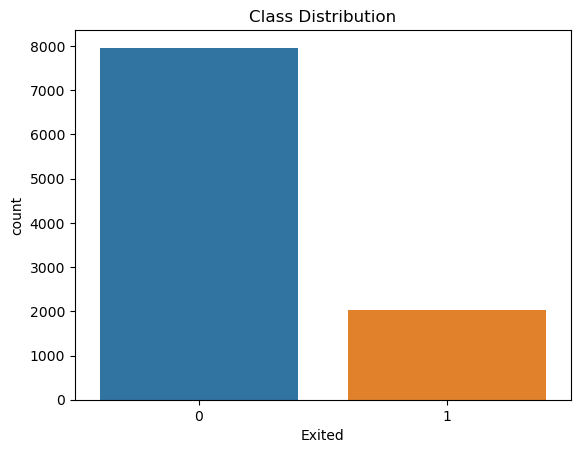

In [10]:
# Visualize class distribution
sns.countplot(x='Exited', data=df)
plt.title('Class Distribution')
plt.show()

## Class Distribution

- **Class 0**: There are 7,962 instances where the value of **Exited** is 0. This represents customers who have not churned (remained with the bank).
- **Class 1**: There are 2,038 instances where the value of **Exited** is 1. This represents customers who have churned (left the bank).

## Class Percentage Distribution

- **Class 0**: This accounts for approximately 79.62% of the total instances in the dataset. It indicates that about 79.62% of customers in the dataset have not churned.
- **Class 1**: This accounts for approximately 20.38% of the total instances in the dataset. It indicates that about 20.38% of customers in the dataset have churned.

### Imbalance Implications

The dataset is highly imbalanced, with non-fraudulent transactions vastly outnumbering fraudulent transactions. This imbalance poses several challenges for machine learning models:

- **Bias-Variance Trade-off**: Models may achieve high accuracy by predicting the majority class but fail to generalize well on the minority class.
- **Overfitting**: The model might overfit to the majority class and consider the minority class as noise.
- **Evaluation Metrics**: Accuracy alone is not a good measure of performance in this case. Metrics like precision, recall, F1-score, and area under the ROC curve are more informative for imbalanced datasets.

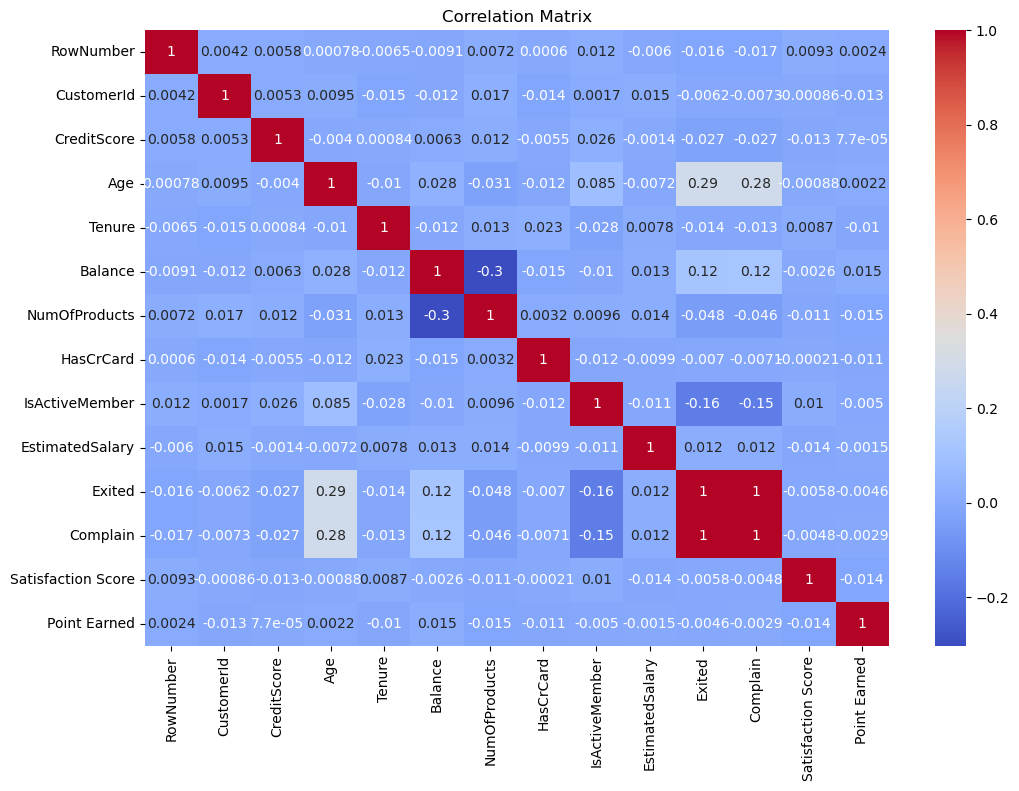

In [11]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

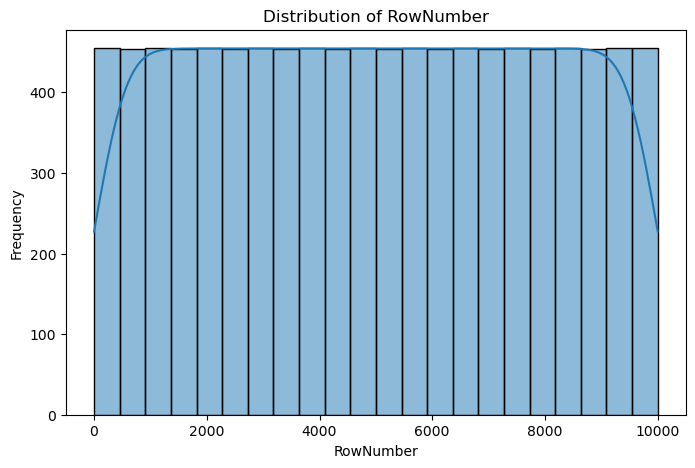

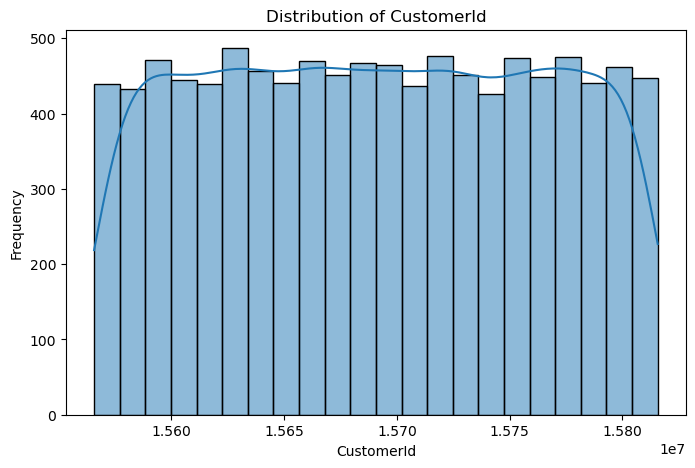

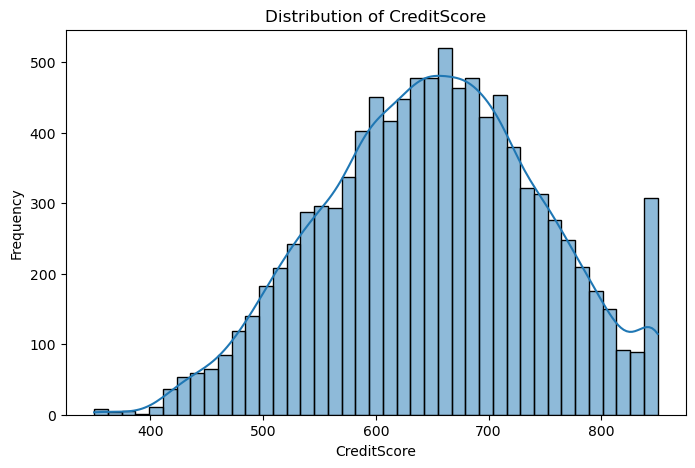

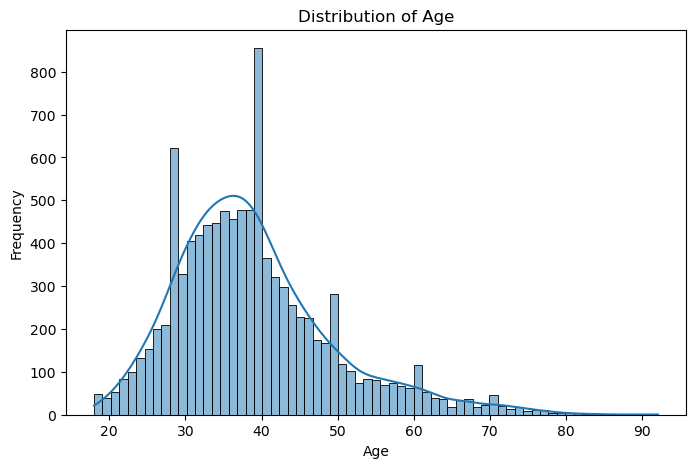

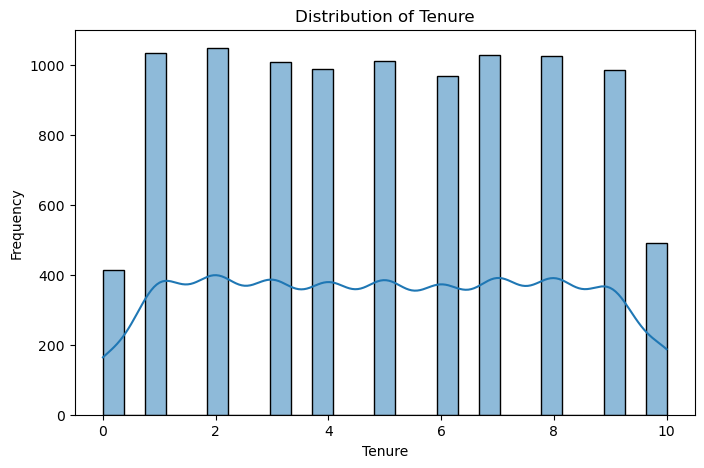

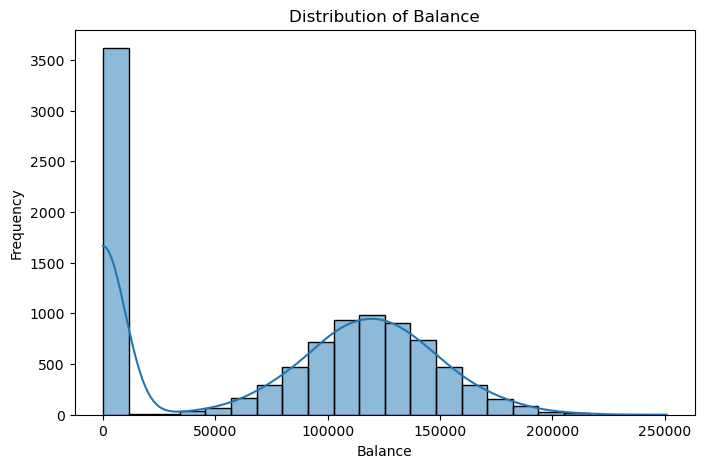

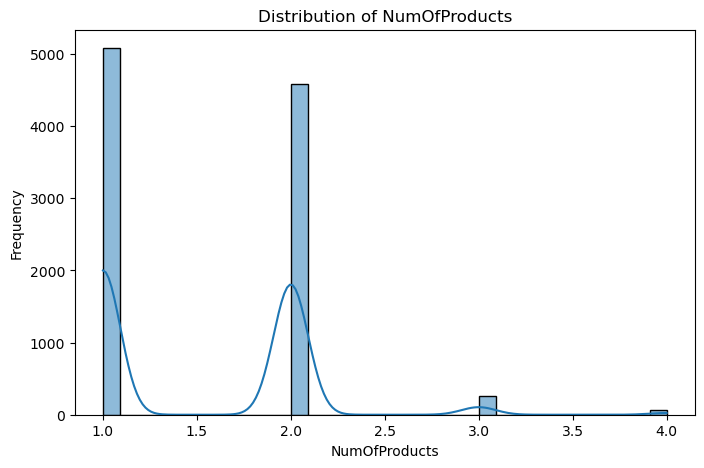

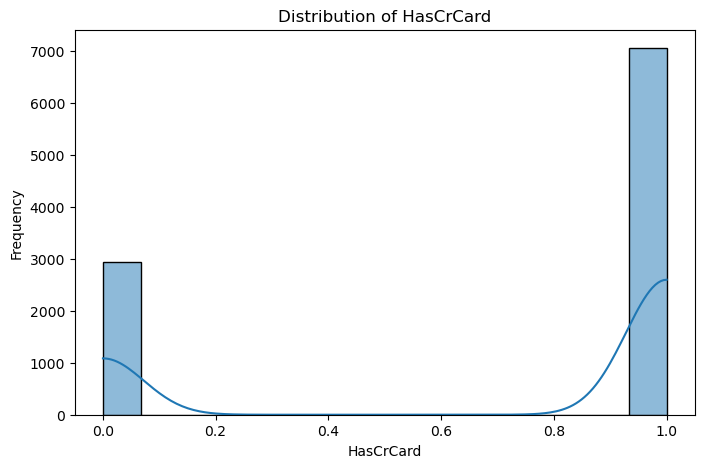

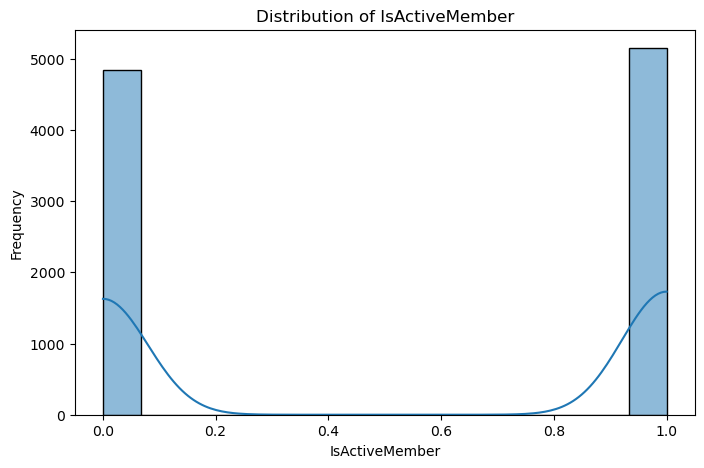

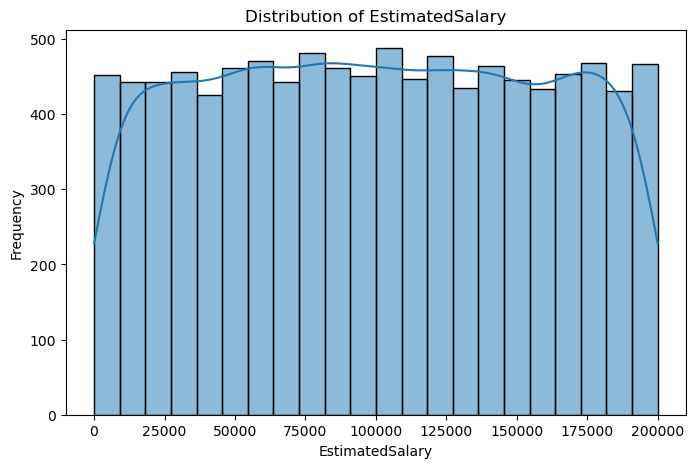

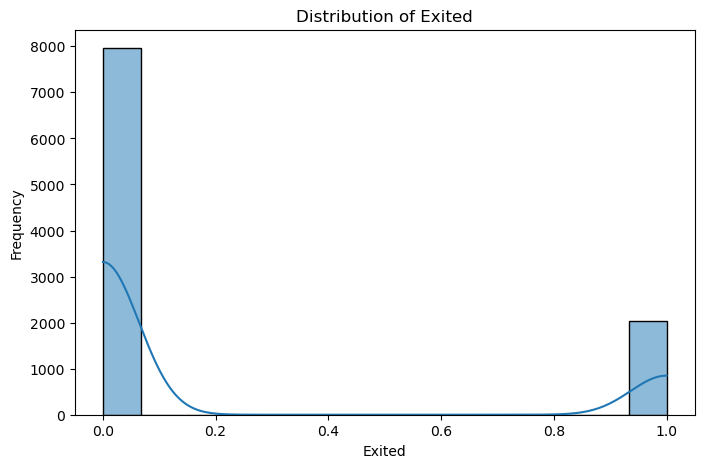

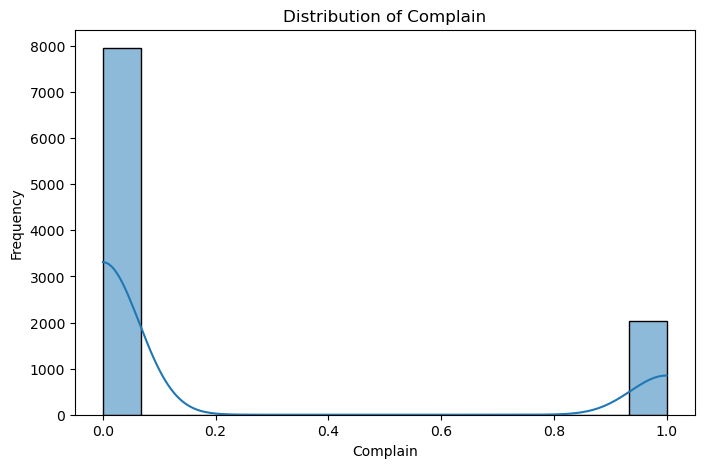

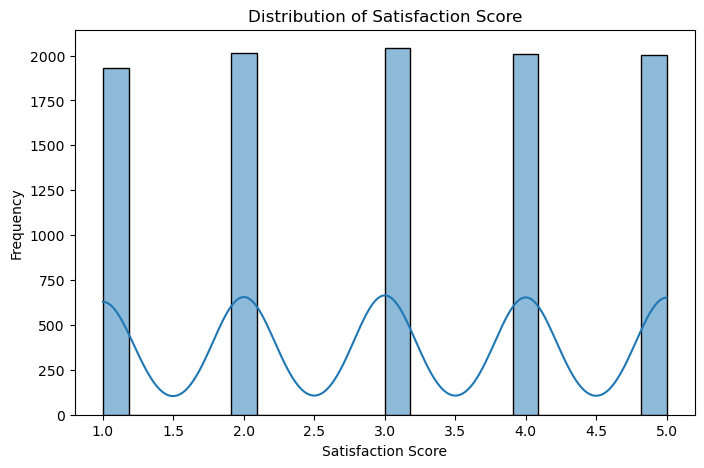

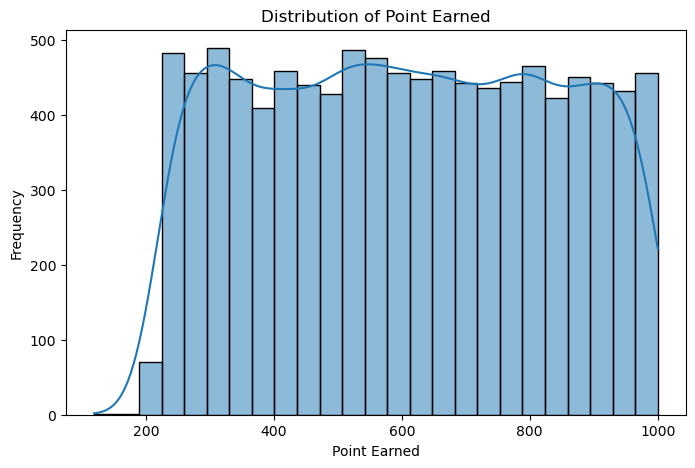

In [12]:
# Distribution plots for numerical variables
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


These graphs shows the data distributions for Numerical Features

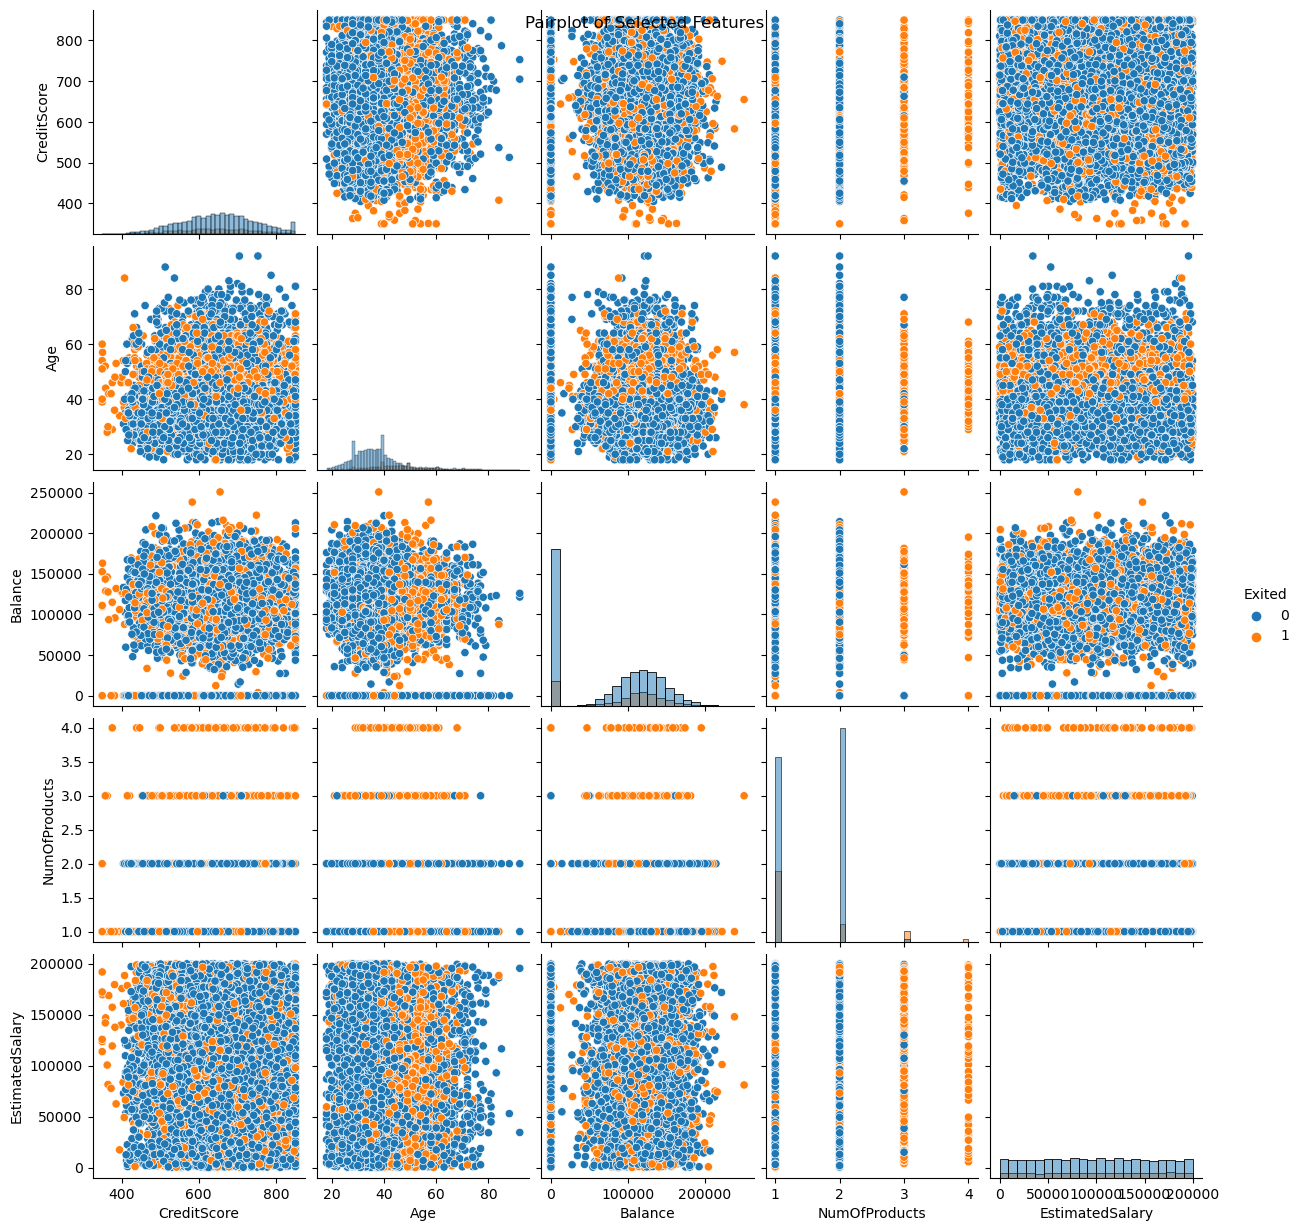

In [13]:
# Pairplot for selected features
selected_features = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Exited']
sns.pairplot(df[selected_features], hue='Exited', diag_kind='hist')
plt.suptitle('Pairplot of Selected Features')
plt.show()


## Feature Selection

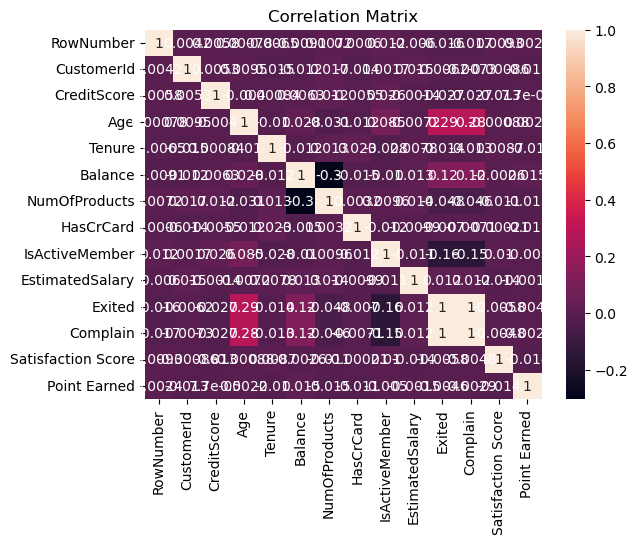

Selected Features:  ['Complain', 'Age', 'IsActiveMember', 'Balance', 'NumOfProducts', 'CreditScore']


In [14]:
# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

# Select features based on correlation with target variable
selected_features = correlation_matrix['Exited'].abs().sort_values(ascending=False).index[1:7].tolist()
print("Selected Features: ", selected_features)

### Feature Selection Technique

**Correlation-based Feature Selection (CFS)**
- **Simplicity**: Effective for initial analysis.
- **Relevance**: Selects highly correlated features with the target and low inter-correlation among features.
- **Efficiency**: Reduces dimensionality, improving model performance and training speed.

## Cross-Validation and Sample Split

In [15]:
# Define stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define train/validation/test split
X = df[selected_features]
y = df['Exited']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, stratify=y_temp, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 7000
Validation set size: 2010
Test set size: 990


In [16]:
X_train.head()

,Complain,Age,IsActiveMember,Balance,NumOfProducts,CreditScore
7680,0,25,1,0.0,2,808
1837,1,56,0,152759.0,2,561
2920,0,33,1,0.0,2,696
2642,0,22,0,98800.0,1,637
4800,0,39,0,0.0,2,690


In [17]:
X_val.head()

,Complain,Age,IsActiveMember,Balance,NumOfProducts,CreditScore
1085,1,42,0,0.00,1,803
5555,0,39,1,0.00,2,614
476,0,31,1,117992.59,1,605
3760,0,38,0,86824.09,1,835
1653,1,56,0,100374.58,1,500


### Cross-Validation

**Stratified K-Fold Cross-Validation**
- **Stratification**: Ensures proportional representation of classes in each fold.
- **Robustness**: Provides comprehensive model evaluation, reducing overfitting risk.
- **Parameters**:
  - **Number of Folds**: 5

### Sample Sizes

**Training/Validation/Test Split**: 70/20/10
- **Training Set (70%)**: Sufficient data for learning.
- **Validation Set (20%)**: For hyperparameter tuning and evaluation.
- **Test Set (10%)**: For unbiased evaluation of final model performance.

# Baseline execution on imbalanced data

## Model Training and Evaluation

## **Logistic Regression**

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef

# Define the model
model_lr = LogisticRegression(random_state=42)

# Train the model on the training set
model_lr.fit(X_train, y_train)

# Evaluate the model on the validation set
y_pred_val = model_lr.predict(X_val)
y_pred_proba_val = model_lr.predict_proba(X_val)[:, 1]

# Calculate evaluation metrics for the validation set
precision_val = precision_score(y_val, y_pred_val)
recall_val = recall_score(y_val, y_pred_val)
f1_val = f1_score(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_proba_val)
mcc_val = matthews_corrcoef(y_val, y_pred_val)

# Evaluate the model on the test set
y_pred_test = model_lr.predict(X_test)
y_pred_proba_test = model_lr.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics for the test set
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
auc_test = roc_auc_score(y_test, y_pred_proba_test)
mcc_test = matthews_corrcoef(y_test, y_pred_test)

# Display results for the validation set
results_val = {
    "Dataset": "Validation",
    "Precision": precision_val,
    "Recall": recall_val,
    "F1-Score": f1_val,
    "AUC-ROC": auc_val,
    "MCC": mcc_val
}

# Display results for the test set
results_test = {
    "Dataset": "Test",
    "Precision": precision_test,
    "Recall": recall_test,
    "F1-Score": f1_test,
    "AUC-ROC": auc_test,
    "MCC": mcc_test
}

print("Validation Set Results:")
print(results_val)
print("\nTest Set Results:")
print(results_test)

Validation Set Results:
{'Dataset': 'Validation', 'Precision': 0.9975550122249389, 'Recall': 0.9975550122249389, 'F1-Score': 0.9975550122249389, 'AUC-ROC': 0.9995968289989906, 'MCC': 0.9969304026059508}

Test Set Results:
{'Dataset': 'Test', 'Precision': 0.995049504950495, 'Recall': 0.995049504950495, 'F1-Score': 0.995049504950495, 'AUC-ROC': 0.9992209880886566, 'MCC': 0.9937804694175001}


## **Random Forest**

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef

# Define the model
model_rf = RandomForestClassifier(random_state=42)

# Train the model on the training set
model_rf.fit(X_train, y_train)

# Evaluate the model on the validation set
y_pred_val_rf = model_rf.predict(X_val)
y_pred_proba_val_rf = model_rf.predict_proba(X_val)[:, 1]

# Calculate evaluation metrics for the validation set
precision_val_rf = precision_score(y_val, y_pred_val_rf)
recall_val_rf = recall_score(y_val, y_pred_val_rf)
f1_val_rf = f1_score(y_val, y_pred_val_rf)
auc_val_rf = roc_auc_score(y_val, y_pred_proba_val_rf)
mcc_val_rf = matthews_corrcoef(y_val, y_pred_val_rf)

# Evaluate the model on the test set
y_pred_test_rf = model_rf.predict(X_test)
y_pred_proba_test_rf = model_rf.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics for the test set
precision_test_rf = precision_score(y_test, y_pred_test_rf)
recall_test_rf = recall_score(y_test, y_pred_test_rf)
f1_test_rf = f1_score(y_test, y_pred_test_rf)
auc_test_rf = roc_auc_score(y_test, y_pred_proba_test_rf)
mcc_test_rf = matthews_corrcoef(y_test, y_pred_test_rf)

# Display results for the validation set
results_val_rf = {
    "Dataset": "Validation",
    "Precision": precision_val_rf,
    "Recall": recall_val_rf,
    "F1-Score": f1_val_rf,
    "AUC-ROC": auc_val_rf,
    "MCC": mcc_val_rf
}

# Display results for the test set
results_test_rf = {
    "Dataset": "Test",
    "Precision": precision_test_rf,
    "Recall": recall_test_rf,
    "F1-Score": f1_test_rf,
    "AUC-ROC": auc_test_rf,
    "MCC": mcc_test_rf
}

print("Validation Set Results for Random Forest:")
print(results_val_rf)
print("\nTest Set Results for Random Forest:")
print(results_test_rf)

Validation Set Results for Random Forest:
{'Dataset': 'Validation', 'Precision': 0.9975550122249389, 'Recall': 0.9975550122249389, 'F1-Score': 0.9975550122249389, 'AUC-ROC': 0.9982170373345511, 'MCC': 0.9969304026059508}

Test Set Results for Random Forest:
{'Dataset': 'Test', 'Precision': 0.995049504950495, 'Recall': 0.995049504950495, 'F1-Score': 0.995049504950495, 'AUC-ROC': 0.9987246821128813, 'MCC': 0.9937804694175001}


## **Gradient Boosting**

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef

# Initialize Gradient Boosting
model_gb = GradientBoostingClassifier(random_state=42)

# Train the model on the training set
model_gb.fit(X_train, y_train)

# Evaluate the model on the validation set
y_pred_val_gb = model_gb.predict(X_val)
y_pred_proba_val_gb = model_gb.predict_proba(X_val)[:, 1]

# Calculate evaluation metrics for the validation set
precision_val_gb = precision_score(y_val, y_pred_val_gb)
recall_val_gb = recall_score(y_val, y_pred_val_gb)
f1_val_gb = f1_score(y_val, y_pred_val_gb)
auc_val_gb = roc_auc_score(y_val, y_pred_proba_val_gb)
mcc_val_gb = matthews_corrcoef(y_val, y_pred_val_gb)

# Evaluate the model on the test set
y_pred_test_gb = model_gb.predict(X_test)
y_pred_proba_test_gb = model_gb.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics for the test set
precision_test_gb = precision_score(y_test, y_pred_test_gb)
recall_test_gb = recall_score(y_test, y_pred_test_gb)
f1_test_gb = f1_score(y_test, y_pred_test_gb)
auc_test_gb = roc_auc_score(y_test, y_pred_proba_test_gb)
mcc_test_gb = matthews_corrcoef(y_test, y_pred_test_gb)

# Display results for the validation set
results_val_gb = {
    "Dataset": "Validation",
    "Precision": precision_val_gb,
    "Recall": recall_val_gb,
    "F1-Score": f1_val_gb,
    "AUC-ROC": auc_val_gb,
    "MCC": mcc_val_gb
}

# Display results for the test set
results_test_gb = {
    "Dataset": "Test",
    "Precision": precision_test_gb,
    "Recall": recall_test_gb,
    "F1-Score": f1_test_gb,
    "AUC-ROC": auc_test_gb,
    "MCC": mcc_test_gb
}

print("Validation Set Results for Gradient Boosting:")
print(results_val_gb)
print("\nTest Set Results for Gradient Boosting:")
print(results_test_gb)

Validation Set Results for Gradient Boosting:
{'Dataset': 'Validation', 'Precision': 0.9975550122249389, 'Recall': 0.9975550122249389, 'F1-Score': 0.9975550122249389, 'AUC-ROC': 0.9992234376741921, 'MCC': 0.9969304026059508}

Test Set Results for Gradient Boosting:
{'Dataset': 'Test', 'Precision': 0.995049504950495, 'Recall': 0.995049504950495, 'F1-Score': 0.995049504950495, 'AUC-ROC': 0.9996984470020606, 'MCC': 0.9937804694175001}


## **XGBoost**

In [21]:
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef

# Define the model
model_xgb = XGBClassifier(scale_pos_weight=(len(y) - sum(y)) / sum(y),
                          use_label_encoder=False,
                          eval_metric='logloss',
                          random_state=42)

# Train the model on the training set
model_xgb.fit(X_train, y_train)

# Evaluate the model on the validation set
y_pred_val_xgb = model_xgb.predict(X_val)
y_pred_proba_val_xgb = model_xgb.predict_proba(X_val)[:, 1]

# Calculate evaluation metrics for the validation set
precision_val_xgb = precision_score(y_val, y_pred_val_xgb)
recall_val_xgb = recall_score(y_val, y_pred_val_xgb)
f1_val_xgb = f1_score(y_val, y_pred_val_xgb)
auc_val_xgb = roc_auc_score(y_val, y_pred_proba_val_xgb)
mcc_val_xgb = matthews_corrcoef(y_val, y_pred_val_xgb)

# Evaluate the model on the test set
y_pred_test_xgb = model_xgb.predict(X_test)
y_pred_proba_test_xgb = model_xgb.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics for the test set
precision_test_xgb = precision_score(y_test, y_pred_test_xgb)
recall_test_xgb = recall_score(y_test, y_pred_test_xgb)
f1_test_xgb = f1_score(y_test, y_pred_test_xgb)
auc_test_xgb = roc_auc_score(y_test, y_pred_proba_test_xgb)
mcc_test_xgb = matthews_corrcoef(y_test, y_pred_test_xgb)

# Display results for the validation set
results_val_xgb = {
    "Dataset": "Validation",
    "Precision": precision_val_xgb,
    "Recall": recall_val_xgb,
    "F1-Score": f1_val_xgb,
    "AUC-ROC": auc_val_xgb,
    "MCC": mcc_val_xgb
}

# Display results for the test set
results_test_xgb = {
    "Dataset": "Test",
    "Precision": precision_test_xgb,
    "Recall": recall_test_xgb,
    "F1-Score": f1_test_xgb,
    "AUC-ROC": auc_test_xgb,
    "MCC": mcc_test_xgb
}

print("Validation Set Results for XGBoost:")
print(results_val_xgb)
print("\nTest Set Results for XGBoost:")
print(results_test_xgb)

Validation Set Results for XGBoost:
{'Dataset': 'Validation', 'Precision': 0.9975550122249389, 'Recall': 0.9975550122249389, 'F1-Score': 0.9975550122249389, 'AUC-ROC': 0.9984361852082058, 'MCC': 0.9969304026059508}

Test Set Results for XGBoost:
{'Dataset': 'Test', 'Precision': 0.995049504950495, 'Recall': 0.995049504950495, 'F1-Score': 0.995049504950495, 'AUC-ROC': 0.9987183997587576, 'MCC': 0.9937804694175001}


## **Neural Network (Multi-layer Perceptron)**

In [22]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef

# Define the model
model_nn = MLPClassifier(random_state=42)

# Train the model on the training set
model_nn.fit(X_train, y_train)

# Evaluate the model on the validation set
y_pred_val_nn = model_nn.predict(X_val)
# Check if the model has the predict_proba method
y_pred_proba_val_nn = model_nn.predict_proba(X_val)[:, 1] if hasattr(model_nn, "predict_proba") else None

# Calculate evaluation metrics for the validation set
precision_val_nn = precision_score(y_val, y_pred_val_nn)
recall_val_nn = recall_score(y_val, y_pred_val_nn)
f1_val_nn = f1_score(y_val, y_pred_val_nn)
auc_val_nn = roc_auc_score(y_val, y_pred_proba_val_nn) if y_pred_proba_val_nn is not None else None
mcc_val_nn = matthews_corrcoef(y_val, y_pred_val_nn)

# Evaluate the model on the test set
y_pred_test_nn = model_nn.predict(X_test)
# Check if the model has the predict_proba method
y_pred_proba_test_nn = model_nn.predict_proba(X_test)[:, 1] if hasattr(model_nn, "predict_proba") else None

# Calculate evaluation metrics for the test set
precision_test_nn = precision_score(y_test, y_pred_test_nn)
recall_test_nn = recall_score(y_test, y_pred_test_nn)
f1_test_nn = f1_score(y_test, y_pred_test_nn)
auc_test_nn = roc_auc_score(y_test, y_pred_proba_test_nn) if y_pred_proba_test_nn is not None else None
mcc_test_nn = matthews_corrcoef(y_test, y_pred_test_nn)

# Display results for the validation set
results_val_nn = {
    "Dataset": "Validation",
    "Precision": precision_val_nn,
    "Recall": recall_val_nn,
    "F1-Score": f1_val_nn,
    "AUC-ROC": auc_val_nn,
    "MCC": mcc_val_nn
}

# Display results for the test set
results_test_nn = {
    "Dataset": "Test",
    "Precision": precision_test_nn,
    "Recall": recall_test_nn,
    "F1-Score": f1_test_nn,
    "AUC-ROC": auc_test_nn,
    "MCC": mcc_test_nn
}

print("Validation Set Results for Neural Network:")
print(results_val_nn)
print("\nTest Set Results for Neural Network:")
print(results_test_nn)

Validation Set Results for Neural Network:
{'Dataset': 'Validation', 'Precision': 0.9705882352941176, 'Recall': 0.08068459657701711, 'F1-Score': 0.1489841986455982, 'AUC-ROC': 0.4610413112831375, 'MCC': 0.249942383104803}

Test Set Results for Neural Network:
{'Dataset': 'Test', 'Precision': 1.0, 'Recall': 0.10396039603960396, 'F1-Score': 0.18834080717488788, 'AUC-ROC': 0.5270392521485652, 'MCC': 0.2907603499328852}


## Classification Algorithms

1. **Logistic Regression**
   - **Simple and interpretable baseline model.**

2. **Random Forest**
   - **Handles non-linear relationships and is robust to overfitting.**

3. **Gradient Boosting (GB)**
   - **Builds sequentially to correct errors, effective for imbalanced datasets, high accuracy.**.

4. **XGBoost (Extreme Gradient Boosting):**
   - **Effective for imbalanced datasets, high accuracy.**

5. **Neural Network (MLPClassifier)**
   - **Captures complex patterns and interactions in data.**

## Performance Metrics Related to Minority Class

1. **Precision**
   - Accuracy of positive predictions (fraud cases).

2. **Recall (Sensitivity)**
   - Ability to identify actual fraud cases.

3. **F1-Score**
   - Balanced measure of precision and recall.

4. **Area Under the ROC Curve (AUC-ROC)**
   - Discrimination ability across all threshold values.

5. **Matthews Correlation Coefficient (MCC)**
   - Comprehensive performance measure, even with imbalanced classes.

# Apply SMOTE to Balance Classes

In [23]:
!pip install scikit-learn==1.0.2
!pip install imbalanced-learn==0.8.1

  Using cached scikit-learn-1.0.2.tar.gz (6.7 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'


  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [66 lines of output]
      Partial import of sklearn during the build process.
      setup.py:128: DeprecationWarning:
      
        `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
        of the deprecation of `distutils` itself. It will be removed for
        Python >= 3.12. For older Python versions it will remain present.
        It is recommended to use `setuptools < 60.0` for those Python versions.
        For more details, see:
          https://numpy.org/devdocs/reference/distutils_status_migration.html
      
      
        from numpy.distutils.command.build_ext import build_ext  # noqa
      INFO: No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
      Traceback (most recent call last):
        File "C:\Users\HP\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.p

In [25]:
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

# Apply SMOTE
smote = SMOTE(random_state=42)
X_re_smote, y_re_smote = smote.fit_resample(X_train, y_train)


# Convert the resampled data to a DataFrame
resampled_data = pd.DataFrame(X_re_smote, columns=X.columns)
resampled_data['Exited'] = y_re_smote


# Save the resampled data to a CSV file
resampled_data.to_csv('Customer-Churn-Records_Smote.csv', index=False)

In [26]:
import pandas as pd
df = pd.read_csv("D:/ML-Project/Balanced Datasets/Customer-Churn-Records_Smote.csv")
df.head()

,Complain,Age,IsActiveMember,Balance,NumOfProducts,CreditScore,Exited
0,0,25,1,0.0,2,808,0
1,1,56,0,152759.0,2,561,1
2,0,33,1,0.0,2,696,0
3,0,22,0,98800.0,1,637,0
4,0,39,0,0.0,2,690,0


In [27]:
# Check the distribution of class labels
class_distribution = df['Exited'].value_counts()
print("Class distribution:")
print(class_distribution)

# Calculate and print the percentage distribution
class_percentage = df['Exited'].value_counts(normalize=True) * 100
print("\nClass percentage distribution:")
print(class_percentage)

Class distribution:
0    5573
1    5573
Name: Exited, dtype: int64

Class percentage distribution:
0    50.0
1    50.0
Name: Exited, dtype: float64


Here we can see that classes are balanced now.

In [28]:
X_re_smote.head()

,Complain,Age,IsActiveMember,Balance,NumOfProducts,CreditScore,Exited
0,0,25,1,0.0,2,808,0
1,1,56,0,152759.0,2,561,1
2,0,33,1,0.0,2,696,0
3,0,22,0,98800.0,1,637,0
4,0,39,0,0.0,2,690,0


In [29]:
X_re_smote = X_re_smote.drop(columns=['Exited'])

In [30]:
X_re_smote.head()

,Complain,Age,IsActiveMember,Balance,NumOfProducts,CreditScore
0,0,25,1,0.0,2,808
1,1,56,0,152759.0,2,561
2,0,33,1,0.0,2,696
3,0,22,0,98800.0,1,637
4,0,39,0,0.0,2,690


## Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, accuracy_score

# Define the model
model_lr = LogisticRegression(random_state=42)

# Train the model
model_lr.fit(X_re_smote, y_re_smote)

# Evaluate the model on the validation set
y_pred_lr = model_lr.predict(X_val)
y_pred_proba_lr = model_lr.predict_proba(X_val)[:, 1]

# Calculate evaluation metrics for the validation set
precision_lr = precision_score(y_val, y_pred_lr)
recall_lr = recall_score(y_val, y_pred_lr)
f1_lr = f1_score(y_val, y_pred_lr)
auc_lr = roc_auc_score(y_val, y_pred_proba_lr)
mcc_lr = matthews_corrcoef(y_val, y_pred_lr)
accuracy_lr = accuracy_score(y_val, y_pred_lr)

# Evaluate the model on the test set
y_pred_test_lr = model_lr.predict(X_test)
y_pred_proba_test_lr = model_lr.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics for the test set
precision_test_lr = precision_score(y_test, y_pred_test_lr)
recall_test_lr = recall_score(y_test, y_pred_test_lr)
f1_test_lr = f1_score(y_test, y_pred_test_lr)
auc_test_lr = roc_auc_score(y_test, y_pred_proba_test_lr)
mcc_test_lr = matthews_corrcoef(y_test, y_pred_test_lr)
accuracy_test_lr = accuracy_score(y_test, y_pred_test_lr)


# Display results for the validation set
results_lr = {
    "Model": "Logistic Regression (Validation Set)",
    "Accuracy": accuracy_lr,
    "Precision": precision_lr,
    "Recall": recall_lr,
    "F1-Score": f1_lr,
    "AUC-ROC": auc_lr,
    "MCC": mcc_lr
}

# Display results for the test set
results_test_lr = {
    "Model": "Logistic Regression (Test Set)",
    "Accuracy": accuracy_test_lr,
    "Precision": precision_test_lr,
    "Recall": recall_test_lr,
    "F1-Score": f1_test_lr,
    "AUC-ROC": auc_test_lr,
    "MCC": mcc_test_lr
}

print("Validation Set Results for Logistic Regression:")
print(results_lr)
print("\nTest Set Results for Logistic Regression:")
print(results_test_lr)

Validation Set Results for Logistic Regression:
{'Model': 'Logistic Regression (Validation Set)', 'Accuracy': 0.9885572139303482, 'Precision': 0.9948717948717949, 'Recall': 0.9486552567237164, 'F1-Score': 0.9712140175219024, 'AUC-ROC': 0.9957697588151659, 'MCC': 0.964503165163805}

Test Set Results for Logistic Regression:
{'Model': 'Logistic Regression (Test Set)', 'Accuracy': 0.9878787878787879, 'Precision': 0.9896907216494846, 'Recall': 0.9504950495049505, 'F1-Score': 0.9696969696969697, 'AUC-ROC': 0.9974556465798864, 'MCC': 0.9624319294459731}


## Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, accuracy_score

# Define the model
model_rf = RandomForestClassifier(random_state=42)

# Train the model
model_rf.fit(X_re_smote, y_re_smote)

# Evaluate the model on the validation set
y_pred_rf = model_rf.predict(X_val)
y_pred_proba_rf = model_rf.predict_proba(X_val)[:, 1]

# Calculate evaluation metrics for the validation set
precision_rf = precision_score(y_val, y_pred_rf)
recall_rf = recall_score(y_val, y_pred_rf)
f1_rf = f1_score(y_val, y_pred_rf)
auc_rf = roc_auc_score(y_val, y_pred_proba_rf)
mcc_rf = matthews_corrcoef(y_val, y_pred_rf)
accuracy_rf = accuracy_score(y_val, y_pred_rf)

# Evaluate the model on the test set
y_pred_test_rf = model_rf.predict(X_test)
y_pred_proba_test_rf = model_rf.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics for the test set
precision_test_rf = precision_score(y_test, y_pred_test_rf)
recall_test_rf = recall_score(y_test, y_pred_test_rf)
f1_test_rf = f1_score(y_test, y_pred_test_rf)
auc_test_rf = roc_auc_score(y_test, y_pred_proba_test_rf)
mcc_test_rf = matthews_corrcoef(y_test, y_pred_test_rf)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)

# Display results for the validation set
results_rf = {
    "Model": "Random Forest (Validation Set)",
    "Accuracy": accuracy_rf,
    "Precision": precision_rf,
    "Recall": recall_rf,
    "F1-Score": f1_rf,
    "AUC-ROC": auc_rf,
    "MCC": mcc_rf
}

# Display results for the test set
results_test_rf = {
    "Model": "Random Forest (Test Set)",
    "Accuracy": accuracy_test_rf,
    "Precision": precision_test_rf,
    "Recall": recall_test_rf,
    "F1-Score": f1_test_rf,
    "AUC-ROC": auc_test_rf,
    "MCC": mcc_test_rf
}

print("Validation Set Results for Random Forest:")
print(results_rf)
print("\nTest Set Results for Random Forest:")
print(results_test_rf)

Validation Set Results for Random Forest:
{'Model': 'Random Forest (Validation Set)', 'Accuracy': 0.9990049751243781, 'Precision': 0.9975550122249389, 'Recall': 0.9975550122249389, 'F1-Score': 0.9975550122249389, 'AUC-ROC': 0.9996082827206101, 'MCC': 0.9969304026059508}

Test Set Results for Random Forest:
{'Model': 'Random Forest (Test Set)', 'Accuracy': 0.997979797979798, 'Precision': 0.995049504950495, 'Recall': 0.995049504950495, 'F1-Score': 0.995049504950495, 'AUC-ROC': 0.9990513645273157, 'MCC': 0.9937804694175001}


## XGBoost

In [33]:
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, accuracy_score

# Define the model
model_xgb = XGBClassifier(scale_pos_weight=(len(y) - sum(y)) / sum(y),
                          use_label_encoder=False,
                          eval_metric='logloss',
                          random_state=42)

# Train the model
model_xgb.fit(X_re_smote, y_re_smote)

# Evaluate the model on the validation set
y_pred_xgb_val = model_xgb.predict(X_val)
y_pred_proba_xgb_val = model_xgb.predict_proba(X_val)[:, 1]

# Calculate evaluation metrics for the validation set
precision_xgb_val = precision_score(y_val, y_pred_xgb_val)
recall_xgb_val = recall_score(y_val, y_pred_xgb_val)
f1_xgb_val = f1_score(y_val, y_pred_xgb_val)
auc_xgb_val = roc_auc_score(y_val, y_pred_proba_xgb_val)
mcc_xgb_val = matthews_corrcoef(y_val, y_pred_xgb_val)
accuracy_xgb_val = accuracy_score(y_val, y_pred_xgb_val)

# Evaluate the model on the test set
y_pred_xgb_test = model_xgb.predict(X_test)
y_pred_proba_xgb_test = model_xgb.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics for the test set
precision_xgb_test = precision_score(y_test, y_pred_xgb_test)
recall_xgb_test = recall_score(y_test, y_pred_xgb_test)
f1_xgb_test = f1_score(y_test, y_pred_xgb_test)
auc_xgb_test = roc_auc_score(y_test, y_pred_proba_xgb_test)
mcc_xgb_test = matthews_corrcoef(y_test, y_pred_xgb_test)
accuracy_xgb_test = accuracy_score(y_test, y_pred_xgb_test)

# Display results for the validation set
results_xgb_val = {
    "Model": "XGBoost (Validation Set)",
    "Accuracy": accuracy_xgb_val,
    "Precision": precision_xgb_val,
    "Recall": recall_xgb_val,
    "F1-Score": f1_xgb_val,
    "AUC-ROC": auc_xgb_val,
    "MCC": mcc_xgb_val
}

# Display results for the test set
results_xgb_test = {
    "Model": "XGBoost (Test Set)",
    "Accuracy": accuracy_xgb_test,
    "Precision": precision_xgb_test,
    "Recall": recall_xgb_test,
    "F1-Score": f1_xgb_test,
    "AUC-ROC": auc_xgb_test,
    "MCC": mcc_xgb_test
}

print("Validation Set Results for XGBoost:")
print(results_xgb_val)

print("\nTest Set Results for XGBoost:")
print(results_xgb_test)

Validation Set Results for XGBoost:
{'Model': 'XGBoost (Validation Set)', 'Accuracy': 0.9985074626865672, 'Precision': 0.9951219512195122, 'Recall': 0.9975550122249389, 'F1-Score': 0.9963369963369964, 'AUC-ROC': 0.9985782113562888, 'MCC': 0.99540096122511}

Test Set Results for XGBoost:
{'Model': 'XGBoost (Test Set)', 'Accuracy': 0.997979797979798, 'Precision': 0.995049504950495, 'Recall': 0.995049504950495, 'F1-Score': 0.995049504950495, 'AUC-ROC': 0.9987623762376238, 'MCC': 0.9937804694175001}


## Gradient Boosting

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, accuracy_score

# Initialize Gradient Boosting
model_gb = GradientBoostingClassifier(random_state=42)

# Train the model
model_gb.fit(X_re_smote, y_re_smote)

# Predict on validation set
y_pred_gb_val = model_gb.predict(X_val)
y_pred_proba_gb_val = model_gb.predict_proba(X_val)[:, 1]

# Calculate evaluation metrics for validation set
precision_gb_val = precision_score(y_val, y_pred_gb_val)
recall_gb_val = recall_score(y_val, y_pred_gb_val)
f1_gb_val = f1_score(y_val, y_pred_gb_val)
auc_gb_val = roc_auc_score(y_val, y_pred_proba_gb_val)
mcc_gb_val = matthews_corrcoef(y_val, y_pred_gb_val)
accuracy_gb_val = accuracy_score(y_val, y_pred_gb_val)

# Predict on test set
y_pred_gb_test = model_gb.predict(X_test)
y_pred_proba_gb_test = model_gb.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics for test set
precision_gb_test = precision_score(y_test, y_pred_gb_test)
recall_gb_test = recall_score(y_test, y_pred_gb_test)
f1_gb_test = f1_score(y_test, y_pred_gb_test)
auc_gb_test = roc_auc_score(y_test, y_pred_proba_gb_test)
mcc_gb_test = matthews_corrcoef(y_test, y_pred_gb_test)
accuracy_gb_test = accuracy_score(y_test, y_pred_gb_test)

# Display results for validation set
results_gb_val = {
    "Model": "Gradient Boosting (Validation Set)",
    "Accuracy": accuracy_gb_val,
    "Precision": precision_gb_val,
    "Recall": recall_gb_val,
    "F1-Score": f1_gb_val,
    "AUC-ROC": auc_gb_val,
    "MCC": mcc_gb_val
}

# Display results for test set
results_gb_test = {
    "Model": "Gradient Boosting (Test Set)",
    "Accuracy": accuracy_gb_test,
    "Precision": precision_gb_test,
    "Recall": recall_gb_test,
    "F1-Score": f1_gb_test,
    "AUC-ROC": auc_gb_test,
    "MCC": mcc_gb_test
}

print("Validation Set Results for Gradient Boosting:")
print(results_gb_val)
print("\nTest Set Results for Gradient Boosting:")
print(results_gb_test)

Validation Set Results for Gradient Boosting:
{'Model': 'Gradient Boosting (Validation Set)', 'Accuracy': 0.9980099502487563, 'Precision': 0.9975429975429976, 'Recall': 0.9926650366748166, 'F1-Score': 0.9950980392156863, 'AUC-ROC': 0.9963752788981216, 'MCC': 0.9938543085399452}

Test Set Results for Gradient Boosting:
{'Model': 'Gradient Boosting (Test Set)', 'Accuracy': 0.996969696969697, 'Precision': 0.9950248756218906, 'Recall': 0.9900990099009901, 'F1-Score': 0.9925558312655087, 'AUC-ROC': 0.999616776398452, 'MCC': 0.9906583075903269}


## Neural Network (Multi-layer Perceptron)

In [35]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, accuracy_score

# Define the model
model_nn = MLPClassifier(random_state=42)

# Train the model
model_nn.fit(X_re_smote, y_re_smote)

# Evaluate the model on the validation set
y_pred_nn_val = model_nn.predict(X_val)
# MLPClassifier does not have predict_proba directly, so you might need to adjust your code accordingly
y_pred_proba_nn_val = model_nn.predict_proba(X_val)[:, 1] if hasattr(model_nn, "predict_proba") else None

# Calculate evaluation metrics for the validation set
precision_nn_val = precision_score(y_val, y_pred_nn_val)
recall_nn_val = recall_score(y_val, y_pred_nn_val)
f1_nn_val = f1_score(y_val, y_pred_nn_val)
auc_nn_val = roc_auc_score(y_val, y_pred_proba_nn_val) if y_pred_proba_nn_val is not None else None
mcc_nn_val = matthews_corrcoef(y_val, y_pred_nn_val)
accuracy_nn_val = accuracy_score(y_val, y_pred_nn_val)

# Evaluate the model on the test set
y_pred_nn_test = model_nn.predict(X_test)
# MLPClassifier does not have predict_proba directly, so you might need to adjust your code accordingly
y_pred_proba_nn_test = model_nn.predict_proba(X_test)[:, 1] if hasattr(model_nn, "predict_proba") else None

# Calculate evaluation metrics for the test set
precision_nn_test = precision_score(y_test, y_pred_nn_test)
recall_nn_test = recall_score(y_test, y_pred_nn_test)
f1_nn_test = f1_score(y_test, y_pred_nn_test)
auc_nn_test = roc_auc_score(y_test, y_pred_proba_nn_test) if y_pred_proba_nn_test is not None else None
mcc_nn_test = matthews_corrcoef(y_test, y_pred_nn_test)
accuracy_nn_test = accuracy_score(y_test, y_pred_nn_test)

# Display results for the validation set
results_nn_val = {
    "Model": "Neural Network (Validation Set)",
    "Accuracy": accuracy_nn_val,
    "Precision": precision_nn_val,
    "Recall": recall_nn_val,
    "F1-Score": f1_nn_val,
    "AUC-ROC": auc_nn_val,
    "MCC": mcc_nn_val
}

# Display results for the test set
results_nn_test = {
    "Model": "Neural Network (Test Set)",
    "Accuracy": accuracy_nn_test,
    "Precision": precision_nn_test,
    "Recall": recall_nn_test,
    "F1-Score": f1_nn_test,
    "AUC-ROC": auc_nn_test,
    "MCC": mcc_nn_test
}

print("Validation Set Results for Neural Network:")
print(results_nn_val)
print("\nTest Set Results for Neural Network:")
print(results_nn_test)

Validation Set Results for Neural Network:
{'Model': 'Neural Network (Validation Set)', 'Accuracy': 0.6945273631840796, 'Precision': 0.3792697290930506, 'Recall': 0.7872860635696821, 'F1-Score': 0.5119236883942766, 'AUC-ROC': 0.7143800711352472, 'MCC': 0.37339076986710645}

Test Set Results for Neural Network:
{'Model': 'Neural Network (Test Set)', 'Accuracy': 0.6626262626262627, 'Precision': 0.35462555066079293, 'Recall': 0.7970297029702971, 'F1-Score': 0.49085365853658536, 'AUC-ROC': 0.7022321204201638, 'MCC': 0.34389358048866214}


# **Algorithmic Methods (Class Weighting and Ensemble Methods)**

## Applying Class Weighting

## Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Define Logistic Regression classifier with class weight
model_lr_weighted = LogisticRegression(class_weight='balanced', random_state=42)

# Train the model
model_lr_weighted.fit(X_train, y_train)

# Evaluate the model on the validation set
y_pred_lr_weighted_val = model_lr_weighted.predict(X_val)

# Calculate evaluation metrics for the validation set
precision_lr_weighted_val = precision_score(y_val, y_pred_lr_weighted_val)
recall_lr_weighted_val = recall_score(y_val, y_pred_lr_weighted_val)
f1_lr_weighted_val = f1_score(y_val, y_pred_lr_weighted_val)
accuracy_lr_weighted_val = accuracy_score(y_val, y_pred_lr_weighted_val)

# Evaluate the model on the test set
y_pred_lr_weighted_test = model_lr_weighted.predict(X_test)

# Calculate evaluation metrics for the test set
precision_lr_weighted_test = precision_score(y_test, y_pred_lr_weighted_test)
recall_lr_weighted_test = recall_score(y_test, y_pred_lr_weighted_test)
f1_lr_weighted_test = f1_score(y_test, y_pred_lr_weighted_test)
accuracy_lr_weighted_test = accuracy_score(y_test, y_pred_lr_weighted_test)

# Display results for the validation set
results_lr_weighted_val = {
    "Model": "Logistic Regression with Class Weighting (Validation Set)",
    "Accuracy": accuracy_lr_weighted_val,
    "Precision": precision_lr_weighted_val,
    "Recall": recall_lr_weighted_val,
    "F1-Score": f1_lr_weighted_val
}

# Display results for the test set
results_lr_weighted_test = {
    "Model": "Logistic Regression with Class Weighting (Test Set)",
    "Accuracy": accuracy_lr_weighted_test,
    "Precision": precision_lr_weighted_test,
    "Recall": recall_lr_weighted_test,
    "F1-Score": f1_lr_weighted_test   
}

print("Validation Set Results for Logistic Regression with Class Weighting:")
print(results_lr_weighted_val)
print("\nTest Set Results for Logistic Regression with Class Weighting:")
print(results_lr_weighted_test)

Validation Set Results for Logistic Regression with Class Weighting:
{'Model': 'Logistic Regression with Class Weighting (Validation Set)', 'Accuracy': 0.9990049751243781, 'Precision': 0.9975550122249389, 'Recall': 0.9975550122249389, 'F1-Score': 0.9975550122249389}

Test Set Results for Logistic Regression with Class Weighting:
{'Model': 'Logistic Regression with Class Weighting (Test Set)', 'Accuracy': 0.997979797979798, 'Precision': 0.995049504950495, 'Recall': 0.995049504950495, 'F1-Score': 0.995049504950495}


- Logistic regression is performed with class weighting set to 'balanced'.

- Class weighting automatically adjusts the weights of the classes inversely proportional to their frequencies.

- Higher weight is given to minority class samples and lower weight to majority class samples during training.

- This approach helps mitigate the issue of class imbalance.

- The model pays more attention to the minority class, improving its ability to correctly classify instances from both classes.

## Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Define Random Forest classifier with class weight
model_rf_weighted = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the model
model_rf_weighted.fit(X_train, y_train)

# Evaluate the model on the validation set
y_pred_rf_val = model_rf_weighted.predict(X_val)

# Calculate evaluation metrics for the validation set
precision_rf_val = precision_score(y_val, y_pred_rf_val)
recall_rf_val = recall_score(y_val, y_pred_rf_val)
f1_rf_val = f1_score(y_val, y_pred_rf_val)
accuracy_rf_val = accuracy_score(y_val, y_pred_rf_val)

# Display results for the validation set
results_rf_val = {
    "Model": "Random Forest with Class Weighting (Validation Set)",
    "Accuracy": accuracy_rf_val,
    "Precision": precision_rf_val,
    "Recall": recall_rf_val,
    "F1-Score": f1_rf_val
}

# Evaluate the model on the test set
y_pred_rf_test = model_rf_weighted.predict(X_test)

# Calculate evaluation metrics for the test set
precision_rf_test = precision_score(y_test, y_pred_rf_test)
recall_rf_test = recall_score(y_test, y_pred_rf_test)
f1_rf_test = f1_score(y_test, y_pred_rf_test)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)

# Display results for the test set
results_rf_test = {
    "Model": "Random Forest with Class Weighting (Test Set)",
    "Accuracy": accuracy_rf_test,
    "Precision": precision_rf_test,
    "Recall": recall_rf_test,
    "F1-Score": f1_rf_test
}

print("Validation Set Results for Random Forest with Class Weighting:")
print(results_rf_val)


print("\nTest Set Results for Random Forest with Class Weighting:")
print(results_rf_test)

Validation Set Results for Random Forest with Class Weighting:
{'Model': 'Random Forest with Class Weighting (Validation Set)', 'Accuracy': 0.9990049751243781, 'Precision': 0.9975550122249389, 'Recall': 0.9975550122249389, 'F1-Score': 0.9975550122249389}

Test Set Results for Random Forest with Class Weighting:
{'Model': 'Random Forest with Class Weighting (Test Set)', 'Accuracy': 0.997979797979798, 'Precision': 0.995049504950495, 'Recall': 0.995049504950495, 'F1-Score': 0.995049504950495}


## Gradient Boosting

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Define Gradient Boosting classifier with class weight
model_gb_weighted = GradientBoostingClassifier(random_state=42)

# Train the model
model_gb_weighted.fit(X_re_smote, y_re_smote)

# Evaluate the model on the validation set
y_pred_gb_val = model_gb_weighted.predict(X_val)

# Calculate evaluation metrics for the validation set
precision_gb_val = precision_score(y_val, y_pred_gb_val)
recall_gb_val = recall_score(y_val, y_pred_gb_val)
f1_gb_val = f1_score(y_val, y_pred_gb_val)
accuracy_gb_val = accuracy_score(y_val, y_pred_gb_val)

# Evaluate the model on the test set
y_pred_gb_test = model_gb_weighted.predict(X_test)

# Calculate evaluation metrics for the test set
precision_gb_test = precision_score(y_test, y_pred_gb_test)
recall_gb_test = recall_score(y_test, y_pred_gb_test)
f1_gb_test = f1_score(y_test, y_pred_gb_test)
accuracy_gb_test = accuracy_score(y_test, y_pred_gb_test)

# Display results for the validation set
results_gb_val = {
    "Model": "Gradient Boosting with Class Weighting (Validation Set)",
    "Accuracy": accuracy_gb_val,
    "Precision": precision_gb_val,
    "Recall": recall_gb_val,
    "F1-Score": f1_gb_val
}

# Display results for the test set
results_gb_test = {
    "Model": "Gradient Boosting with Class Weighting (Test Set)",
    "Accuracy": accuracy_gb_test,
    "Precision": precision_gb_test,
    "Recall": recall_gb_test,
    "F1-Score": f1_gb_test
}

print("Validation Set Results for Gradient Boosting with Class Weighting:")
print(results_gb_val)
print("\nTest Set Results for Gradient Boosting with Class Weighting:")
print(results_gb_test)

Validation Set Results for Gradient Boosting with Class Weighting:
{'Model': 'Gradient Boosting with Class Weighting (Validation Set)', 'Accuracy': 0.9980099502487563, 'Precision': 0.9975429975429976, 'Recall': 0.9926650366748166, 'F1-Score': 0.9950980392156863}

Test Set Results for Gradient Boosting with Class Weighting:
{'Model': 'Gradient Boosting with Class Weighting (Test Set)', 'Accuracy': 0.996969696969697, 'Precision': 0.9950248756218906, 'Recall': 0.9900990099009901, 'F1-Score': 0.9925558312655087}


## **XGBoost**

In [39]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, accuracy_score

# Calculate class weights
class_weights = (len(y_train) - sum(y_train)) / sum(y_train)

# Define the model with class weights
model_xgb = XGBClassifier(scale_pos_weight=class_weights,
                          use_label_encoder=False,
                          eval_metric='logloss',
                          random_state=42)

# Train the model
model_xgb.fit(X_train, y_train)

# Predict on the validation set
y_pred_val_xgb = model_xgb.predict(X_val)
y_pred_proba_val_xgb = model_xgb.predict_proba(X_val)[:, 1]

# Predict on the test set
y_pred_test_xgb = model_xgb.predict(X_test)
y_pred_proba_test_xgb = model_xgb.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics for the validation set
precision_val_xgb = precision_score(y_val, y_pred_val_xgb)
recall_val_xgb = recall_score(y_val, y_pred_val_xgb)
f1_val_xgb = f1_score(y_val, y_pred_val_xgb)
accuracy_val_xgb = accuracy_score(y_val, y_pred_val_xgb)

# Calculate evaluation metrics for the test set
precision_test_xgb = precision_score(y_test, y_pred_test_xgb)
recall_test_xgb = recall_score(y_test, y_pred_test_xgb)
f1_test_xgb = f1_score(y_test, y_pred_test_xgb)
accuracy_test_xgb = accuracy_score(y_test, y_pred_test_xgb)

# Display results for the validation set
results_val_xgb = {
    "Model": "XGBoost with Class Weights (Validation)",
    "Accuracy": accuracy_val_xgb,
    "Precision": precision_val_xgb,
    "Recall": recall_val_xgb,
    "F1-Score": f1_val_xgb,   
}

# Display results for the test set
results_test_xgb = {
    "Model": "XGBoost with Class Weights (Test)",
    "Accuracy": accuracy_test_xgb,
    "Precision": precision_test_xgb,
    "Recall": recall_test_xgb,
    "F1-Score": f1_test_xgb
}

print("Validation Set Results for XGBoost with Class Weights:")
print(results_val_xgb)
print("\nTest Set Results for XGBoost with Class Weights:")
print(results_test_xgb)

Validation Set Results for XGBoost with Class Weights:
{'Model': 'XGBoost with Class Weights (Validation)', 'Accuracy': 0.9990049751243781, 'Precision': 0.9975550122249389, 'Recall': 0.9975550122249389, 'F1-Score': 0.9975550122249389}

Test Set Results for XGBoost with Class Weights:
{'Model': 'XGBoost with Class Weights (Test)', 'Accuracy': 0.997979797979798, 'Precision': 0.995049504950495, 'Recall': 0.995049504950495, 'F1-Score': 0.995049504950495}


## **Neural Network (Multi-layer Perceptron)**

In [40]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score

# Define individual neural network models
model_nn1 = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)
model_nn2 = MLPClassifier(hidden_layer_sizes=(50,), activation='relu', solver='adam', random_state=42)
model_nn3 = MLPClassifier(hidden_layer_sizes=(200,), activation='relu', solver='adam', random_state=42)

# Create a voting classifier with the individual neural network models
voting_clf = VotingClassifier(estimators=[('nn1', model_nn1), ('nn2', model_nn2), ('nn3', model_nn3)], voting='soft')

# Train the voting classifier
voting_clf.fit(X_train, y_train)

# Evaluate on validation set
y_pred_val = voting_clf.predict(X_val)
y_pred_proba_val = voting_clf.predict_proba(X_val)[:, 1]

# Calculate evaluation metrics for validation set
precision_val = precision_score(y_val, y_pred_val)
recall_val = recall_score(y_val, y_pred_val)
f1_val = f1_score(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_proba_val)
accuracy_val = accuracy_score(y_val, y_pred_val)

# Evaluate on test set
y_pred_test = voting_clf.predict(X_test)
y_pred_proba_test = voting_clf.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics for test set
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
auc_test = roc_auc_score(y_test, y_pred_proba_test)
accuracy_test = accuracy_score(y_test, y_pred_test)

# Display results for validation set
results_val = {
    "Model": "Neural Network Ensemble (Validation Set)",
    "Accuracy": accuracy_val,
    "Precision": precision_val,
    "Recall": recall_val,
    "F1-Score": f1_val,
    "AUC-ROC": auc_val
}

# Display results for test set
results_test = {
    "Model": "Neural Network Ensemble (Test Set)",
    "Accuracy": accuracy_test,
    "Precision": precision_test,
    "Recall": recall_test,
    "F1-Score": f1_test,
    "AUC-ROC": auc_test
}

print("Validation Set Results for Neural Network Ensemble:")
print(results_val)
print("\nTest Set Results for Neural Network Ensemble:")
print(results_test)

Validation Set Results for Neural Network Ensemble:
{'Model': 'Neural Network Ensemble (Validation Set)', 'Accuracy': 0.7970149253731343, 'Precision': 1.0, 'Recall': 0.0024449877750611247, 'F1-Score': 0.004878048780487805, 'AUC-ROC': 0.4609512086730635}

Test Set Results for Neural Network Ensemble:
{'Model': 'Neural Network Ensemble (Test Set)', 'Accuracy': 0.797979797979798, 'Precision': 1.0, 'Recall': 0.009900990099009901, 'F1-Score': 0.0196078431372549, 'AUC-ROC': 0.526995275669699}


# Cluster Oversampling technique

In [78]:
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd

# Assuming X is your feature matrix and y is your target vector

# Step 1: Clustering
n_clusters = 3  # This should be based on the optimal number from your analysis
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X)
X = pd.DataFrame(X)
X['Cluster'] = clusters

# Step 2: Apply SMOTE within each cluster
X_resampled_list = []
y_resampled_list = []

for cluster in X['Cluster'].unique():
    X_cluster = X[X['Cluster'] == cluster]
    y_cluster = y[X['Cluster'] == cluster]
    
    print(f"Processing cluster {cluster} with {len(X_cluster)} samples.")

    if len(X_cluster) > 1:
        # Ensure k_neighbors is less than the number of samples in the cluster
        k_neighbors = min(5, len(X_cluster)-1 )
        smote = SMOTE(k_neighbors=k_neighbors, random_state=42)
        try:
            X_res, y_res = smote.fit_resample(X_cluster, y_cluster)
            print(f"SMOTE applied to cluster {cluster}.")
        except ValueError as e:
            print(f"Error in SMOTE for cluster {cluster}: {e}")
            X_res, y_res = X_cluster, y_cluster  # Use original cluster if SMOTE fails
    else:
        # If the cluster is too small, just replicate the samples
        print(f"Cluster {cluster} is too small for SMOTE. Using original samples.")
        X_res, y_res = X_cluster, y_cluster
    
    X_resampled_list.append(X_res)
    y_resampled_list.append(y_res)

# Concatenate all the resampled clusters
X_train_resampled = pd.concat(X_resampled_list, axis=0)
y_train_resampled = pd.concat(y_resampled_list, axis=0)

print("Original shape:", X.shape)
print("Resampled shape:", X_train_resampled.shape)

Processing cluster 1 with 3689 samples.
SMOTE applied to cluster 1.
Processing cluster 0 with 3213 samples.
SMOTE applied to cluster 0.
Processing cluster 2 with 3098 samples.
SMOTE applied to cluster 2.
Original shape: (10000, 7)
Resampled shape: (15924, 7)


In [79]:
# Convert X_train_resampled back to a DataFrame (if needed)
X_train_resampled = pd.DataFrame(X_train_resampled, columns=X.columns.drop('Cluster'))

# Save the balanced dataset to a CSV file
balanced_data = pd.concat([X_train_resampled, y_train_resampled], axis=1)
balanced_data.to_csv('Customer_Churn_ClusterOverSample.csv', index=False)

print("Balanced dataset saved successfully.")

Balanced dataset saved successfully.


In [80]:
df = pd.read_csv("D:/ML-Project/Balanced Datasets/Customer_Churn_ClusterOverSample.csv")

In [81]:
# Check the distribution of class labels
class_distribution = df['Exited'].value_counts()
print("Class distribution:")
print(class_distribution)

# Calculate and print the percentage distribution
class_percentage = df['Exited'].value_counts(normalize=True) * 100
print("\nClass percentage distribution:")
print(class_percentage)

Class distribution:
1    7962
0    7962
Name: Exited, dtype: int64

Class percentage distribution:
1    50.0
0    50.0
Name: Exited, dtype: float64


In [82]:
X_resampled = X_train_resampled
y_resampled = y_train_resampled

In [83]:
from sklearn.model_selection import train_test_split, StratifiedKFold

# Define stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Ensure consistent lengths
assert len(X_resampled) == len(y_resampled), "Inconsistent number of samples between X_resampled and y_resampled"

# Split data into training and temp sets
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, stratify=y_resampled, random_state=42)

# Split temp set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, stratify=y_temp, random_state=42)

# Print the sizes of each set
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 11146
Validation set size: 3201
Test set size: 1577


# Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef

# Define the model
model_lr = LogisticRegression(random_state=42)

# Train the model on the training set
model_lr.fit(X_train, y_train)

# Evaluate the model on the validation set
y_pred_val = model_lr.predict(X_val)
y_pred_proba_val = model_lr.predict_proba(X_val)[:, 1]

# Calculate evaluation metrics for the validation set
precision_val = precision_score(y_val, y_pred_val)
recall_val = recall_score(y_val, y_pred_val)
f1_val = f1_score(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_proba_val)
mcc_val = matthews_corrcoef(y_val, y_pred_val)

# Evaluate the model on the test set
y_pred_test = model_lr.predict(X_test)
y_pred_proba_test = model_lr.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics for the test set
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
auc_test = roc_auc_score(y_test, y_pred_proba_test)
mcc_test = matthews_corrcoef(y_test, y_pred_test)

# Display results for the validation set
results_val = {
    "Dataset": "Validation",
    "Precision": precision_val,
    "Recall": recall_val,
    "F1-Score": f1_val,
    "AUC-ROC": auc_val,
    "MCC": mcc_val
}

# Display results for the test set
results_test = {
    "Dataset": "Test",
    "Precision": precision_test,
    "Recall": recall_test,
    "F1-Score": f1_test,
    "AUC-ROC": auc_test,
    "MCC": mcc_test
}

print("Validation Set Results:")
print(results_val)
print("\nTest Set Results:")
print(results_test)

Validation Set Results:
{'Dataset': 'Validation', 'Precision': 0.9968710888610763, 'Recall': 0.9950031230480949, 'F1-Score': 0.9959362300718975, 'AUC-ROC': 0.998349078700812, 'MCC': 0.9918792846812916}

Test Set Results:
{'Dataset': 'Test', 'Precision': 1.0, 'Recall': 0.9974619289340102, 'F1-Score': 0.9987293519695044, 'AUC-ROC': 0.9999115374470029, 'MCC': 0.9974667419522325}


# Random Forest

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef

# Define the model
model_rf = RandomForestClassifier(random_state=42)

# Train the model on the training set
model_rf.fit(X_train, y_train)

# Evaluate the model on the validation set
y_pred_val_rf = model_rf.predict(X_val)
y_pred_proba_val_rf = model_rf.predict_proba(X_val)[:, 1]

# Calculate evaluation metrics for the validation set
precision_val_rf = precision_score(y_val, y_pred_val_rf)
recall_val_rf = recall_score(y_val, y_pred_val_rf)
f1_val_rf = f1_score(y_val, y_pred_val_rf)
auc_val_rf = roc_auc_score(y_val, y_pred_proba_val_rf)
mcc_val_rf = matthews_corrcoef(y_val, y_pred_val_rf)

# Evaluate the model on the test set
y_pred_test_rf = model_rf.predict(X_test)
y_pred_proba_test_rf = model_rf.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics for the test set
precision_test_rf = precision_score(y_test, y_pred_test_rf)
recall_test_rf = recall_score(y_test, y_pred_test_rf)
f1_test_rf = f1_score(y_test, y_pred_test_rf)
auc_test_rf = roc_auc_score(y_test, y_pred_proba_test_rf)
mcc_test_rf = matthews_corrcoef(y_test, y_pred_test_rf)

# Display results for the validation set
results_val_rf = {
    "Dataset": "Validation",
    "Precision": precision_val_rf,
    "Recall": recall_val_rf,
    "F1-Score": f1_val_rf,
    "AUC-ROC": auc_val_rf,
    "MCC": mcc_val_rf
}

# Display results for the test set
results_test_rf = {
    "Dataset": "Test",
    "Precision": precision_test_rf,
    "Recall": recall_test_rf,
    "F1-Score": f1_test_rf,
    "AUC-ROC": auc_test_rf,
    "MCC": mcc_test_rf
}

print("Validation Set Results for Random Forest:")
print(results_val_rf)
print("\nTest Set Results for Random Forest:")
print(results_test_rf)

Validation Set Results for Random Forest:
{'Dataset': 'Validation', 'Precision': 0.9968730456535334, 'Recall': 0.995627732667083, 'F1-Score': 0.99625, 'AUC-ROC': 0.9989217676452217, 'MCC': 0.992503120121531}

Test Set Results for Random Forest:
{'Dataset': 'Test', 'Precision': 1.0, 'Recall': 0.998730964467005, 'F1-Score': 0.9993650793650793, 'AUC-ROC': 0.999996783179891, 'MCC': 0.9987325708398056}


# Gradient Boosting

In [86]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef

# Initialize Gradient Boosting
model_gb = GradientBoostingClassifier(random_state=42)

# Train the model on the training set
model_gb.fit(X_train, y_train)

# Evaluate the model on the validation set
y_pred_val_gb = model_gb.predict(X_val)
y_pred_proba_val_gb = model_gb.predict_proba(X_val)[:, 1]

# Calculate evaluation metrics for the validation set
precision_val_gb = precision_score(y_val, y_pred_val_gb)
recall_val_gb = recall_score(y_val, y_pred_val_gb)
f1_val_gb = f1_score(y_val, y_pred_val_gb)
auc_val_gb = roc_auc_score(y_val, y_pred_proba_val_gb)
mcc_val_gb = matthews_corrcoef(y_val, y_pred_val_gb)

# Evaluate the model on the test set
y_pred_test_gb = model_gb.predict(X_test)
y_pred_proba_test_gb = model_gb.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics for the test set
precision_test_gb = precision_score(y_test, y_pred_test_gb)
recall_test_gb = recall_score(y_test, y_pred_test_gb)
f1_test_gb = f1_score(y_test, y_pred_test_gb)
auc_test_gb = roc_auc_score(y_test, y_pred_proba_test_gb)
mcc_test_gb = matthews_corrcoef(y_test, y_pred_test_gb)

# Display results for the validation set
results_val_gb = {
    "Dataset": "Validation",
    "Precision": precision_val_gb,
    "Recall": recall_val_gb,
    "F1-Score": f1_val_gb,
    "AUC-ROC": auc_val_gb,
    "MCC": mcc_val_gb
}

# Display results for the test set
results_test_gb = {
    "Dataset": "Test",
    "Precision": precision_test_gb,
    "Recall": recall_test_gb,
    "F1-Score": f1_test_gb,
    "AUC-ROC": auc_test_gb,
    "MCC": mcc_test_gb
}

print("Validation Set Results for Gradient Boosting:")
print(results_val_gb)
print("\nTest Set Results for Gradient Boosting:")
print(results_test_gb)

Validation Set Results for Gradient Boosting:
{'Dataset': 'Validation', 'Precision': 0.9968769519050593, 'Recall': 0.9968769519050593, 'F1-Score': 0.9968769519050593, 'AUC-ROC': 0.9995608213616489, 'MCC': 0.9937519519050594}

Test Set Results for Gradient Boosting:
{'Dataset': 'Test', 'Precision': 0.9974619289340102, 'Recall': 0.9974619289340102, 'F1-Score': 0.9974619289340102, 'AUC-ROC': 0.999676709579047, 'MCC': 0.9949270746881292}


# XGBoost

In [87]:
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef

# Define the model
model_xgb = XGBClassifier(scale_pos_weight=(len(y_resampled) - sum(y_resampled)) / sum(y_resampled),
                          use_label_encoder=False,
                          eval_metric='logloss',
                          random_state=42)

# Train the model on the training set
model_xgb.fit(X_train, y_train)

# Evaluate the model on the validation set
y_pred_val_xgb = model_xgb.predict(X_val)
y_pred_proba_val_xgb = model_xgb.predict_proba(X_val)[:, 1]

# Calculate evaluation metrics for the validation set
precision_val_xgb = precision_score(y_val, y_pred_val_xgb)
recall_val_xgb = recall_score(y_val, y_pred_val_xgb)
f1_val_xgb = f1_score(y_val, y_pred_val_xgb)
auc_val_xgb = roc_auc_score(y_val, y_pred_proba_val_xgb)
mcc_val_xgb = matthews_corrcoef(y_val, y_pred_val_xgb)

# Evaluate the model on the test set
y_pred_test_xgb = model_xgb.predict(X_test)
y_pred_proba_test_xgb = model_xgb.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics for the test set
precision_test_xgb = precision_score(y_test, y_pred_test_xgb)
recall_test_xgb = recall_score(y_test, y_pred_test_xgb)
f1_test_xgb = f1_score(y_test, y_pred_test_xgb)
auc_test_xgb = roc_auc_score(y_test, y_pred_proba_test_xgb)
mcc_test_xgb = matthews_corrcoef(y_test, y_pred_test_xgb)

# Display results for the validation set
results_val_xgb = {
    "Dataset": "Validation",
    "Precision": precision_val_xgb,
    "Recall": recall_val_xgb,
    "F1-Score": f1_val_xgb,
    "AUC-ROC": auc_val_xgb,
    "MCC": mcc_val_xgb
}

# Display results for the test set
results_test_xgb = {
    "Dataset": "Test",
    "Precision": precision_test_xgb,
    "Recall": recall_test_xgb,
    "F1-Score": f1_test_xgb,
    "AUC-ROC": auc_test_xgb,
    "MCC": mcc_test_xgb
}

print("Validation Set Results for XGBoost:")
print(results_val_xgb)
print("\nTest Set Results for XGBoost:")
print(results_test_xgb)

Validation Set Results for XGBoost:
{'Dataset': 'Validation', 'Precision': 0.9968769519050593, 'Recall': 0.9968769519050593, 'F1-Score': 0.9968769519050593, 'AUC-ROC': 0.9990543019987508, 'MCC': 0.9937519519050594}

Test Set Results for XGBoost:
{'Dataset': 'Test', 'Precision': 0.9974683544303797, 'Recall': 1.0, 'F1-Score': 0.9987325728770595, 'AUC-ROC': 0.999996783179891, 'MCC': 0.9974667500909592}


# Neural Netwrok (Multi-layer Perceptron)

In [88]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef

# Define the model
model_nn = MLPClassifier(random_state=42)

# Train the model on the training set
model_nn.fit(X_train, y_train)

# Evaluate the model on the validation set
y_pred_val_nn = model_nn.predict(X_val)
# Check if the model has the predict_proba method
y_pred_proba_val_nn = model_nn.predict_proba(X_val)[:, 1] if hasattr(model_nn, "predict_proba") else None

# Calculate evaluation metrics for the validation set
precision_val_nn = precision_score(y_val, y_pred_val_nn)
recall_val_nn = recall_score(y_val, y_pred_val_nn)
f1_val_nn = f1_score(y_val, y_pred_val_nn)
auc_val_nn = roc_auc_score(y_val, y_pred_proba_val_nn) if y_pred_proba_val_nn is not None else None
mcc_val_nn = matthews_corrcoef(y_val, y_pred_val_nn)

# Evaluate the model on the test set
y_pred_test_nn = model_nn.predict(X_test)
# Check if the model has the predict_proba method
y_pred_proba_test_nn = model_nn.predict_proba(X_test)[:, 1] if hasattr(model_nn, "predict_proba") else None

# Calculate evaluation metrics for the test set
precision_test_nn = precision_score(y_test, y_pred_test_nn)
recall_test_nn = recall_score(y_test, y_pred_test_nn)
f1_test_nn = f1_score(y_test, y_pred_test_nn)
auc_test_nn = roc_auc_score(y_test, y_pred_proba_test_nn) if y_pred_proba_test_nn is not None else None
mcc_test_nn = matthews_corrcoef(y_test, y_pred_test_nn)

# Display results for the validation set
results_val_nn = {
    "Dataset": "Validation",
    "Precision": precision_val_nn,
    "Recall": recall_val_nn,
    "F1-Score": f1_val_nn,
    "AUC-ROC": auc_val_nn,
    "MCC": mcc_val_nn
}

# Display results for the test set
results_test_nn = {
    "Dataset": "Test",
    "Precision": precision_test_nn,
    "Recall": recall_test_nn,
    "F1-Score": f1_test_nn,
    "AUC-ROC": auc_test_nn,
    "MCC": mcc_test_nn
}

print("Validation Set Results for Neural Network:")
print(results_val_nn)
print("\nTest Set Results for Neural Network:")
print(results_test_nn)

Validation Set Results for Neural Network:
{'Dataset': 'Validation', 'Precision': 1.0, 'Recall': 0.3735165521549032, 'F1-Score': 0.5438835834470214, 'AUC-ROC': 0.607184572142411, 'MCC': 0.4791569957780964}

Test Set Results for Neural Network:
{'Dataset': 'Test', 'Precision': 1.0, 'Recall': 0.3426395939086294, 'F1-Score': 0.5103969754253308, 'AUC-ROC': 0.6011947269884774, 'MCC': 0.45479897910559614}
